## **Fitting Feed-Foward Architectures**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/housing_data_sold.csv')
df.head()

,Bedrooms,Area,City_Distance,Age,Price,sold_10
0,1,26.184098,1286.68,67,96004.804557,1
1,1,34.866901,1855.25,30,92473.722570,1
2,1,36.980709,692.09,24,98112.519940,1
3,1,17.445723,1399.49,66,92118.326874,1
4,1,52.587646,84.65,3,98976.653176,1


In [3]:
## Create X matrix
## y vector: Price
X = df.drop(columns=['Price', 'sold_10'])
y = df['Price']

In [4]:
## split 70% /30% seed = 630
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=630)

**Feed-Forward**

We use the `Sequential()` module. From input to output layer. We also the `Dense()` layer to create neurons that are fully connected (all weights and biases).

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import Constant, RandomNormal, RandomUniform, GlorotNormal,HeNormal, Orthogonal, GlorotUniform


## Skeleton of NN
model = Sequential() ## empy Feed-foward
model.add(Input(shape = (4,)))              ## input layer (how many predictors)
model.add(Dense(1, activation = "linear", kernel_initializer = GlorotUniform(seed = 630), bias_initializer=Constant(0)))  ## output layer

## summary (weights and biases)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
## initial weights
w, b = model.get_weights()
print(w,b)

[[-0.21318603]
 [-0.3675208 ]
 [ 0.89284503]
 [-0.62191045]] [0.]


In [17]:
## options;
## hidden layers: tanh, sigmoid activations ----- Glorot Uniform or Normal, Lecun Uniform or Normal (for normalized data)
## hidden layers: ReLu ---------------------------Glorot, He (uniform or normal)
## RNNs ----------------------------------------- Orthogonal initializers

In [21]:
## the forward pass
model.predict(X_train)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[1117.8384 ],
       [1603.7341 ],
       [1310.218  ],
       ...,
       [ 346.0211 ],
       [ 535.58545],
       [ 763.69727]], dtype=float32)

In [26]:
x1 = X_train.head(1).values.T
x1

array([[   3.        ],
       [ 145.75867153],
       [1316.89      ],
       [   6.        ]])

In [27]:
## FORWARD PASS is just the prediction with the current weights
## Prediction f(w'x + b)
def linear(z):
  return z

pred1 = linear(w.T.dot(x1)+b)
pred1

array([[1117.83833191]])

## **Steps or Iterations**

We go down the gradient and the weights need to be updated at each step.

In [32]:
## COMPILATION: loss function - calculate J(w) on the training set by default
## learning rate is part of the optimizer
## ADAM (stochastic gradient descent with momemtum)
from tensorflow.keras.optimizers import Adam

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.4))

In [40]:
## fit on the training
## iter1: J(w) = 9032797184.0000 using weights and biases at iter 1
## so on
## training for LONG just gets a lower J(w)
## want to include a validation data set
## validation_split = 0.2              ## most accurate approach
## validation_data = (X_test, y_test)  ## most common
## save this to plot in a learning curve
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 837000960.0000 - val_loss: 875808640.0000
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 847908992.0000 - val_loss: 870440128.0000
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 857037440.0000 - val_loss: 869334272.0000
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 835362368.0000 - val_loss: 868399616.0000
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 853896576.0000 - val_loss: 867334144.0000
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 870500224.0000 - val_loss: 870339072.0000
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 825231232.0000 - val_loss: 866425536.0000
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 854114560.0000 - val_loss: 864524672.0000
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 836606784.0000 - val_loss: 863862272.0000
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 817293312.0000 - val_loss: 862816064.0000

In [ ]:
## BACKWARD PROPAGATION (OF ERRORS)
## modifying the w and b vectors to go down the gradient at each iteration

In [41]:
w, b = model.get_weights()
print(w, b)

[[2427.7534  ]
 [ 105.39703 ]
 [  29.235655]
 [ 576.38153 ]] [5332.952]


In [35]:
## a PRE-TRAINED model has optimized weights and biases for a given problem

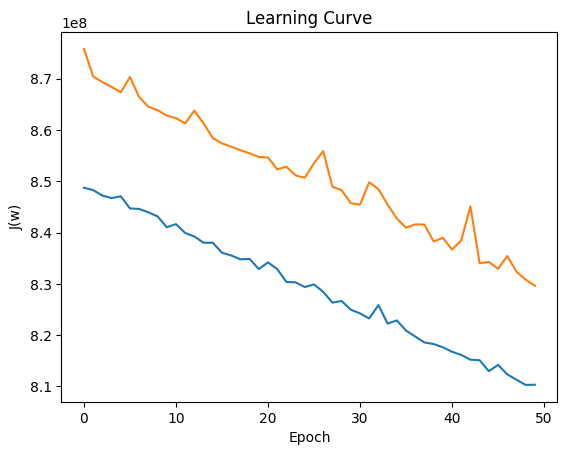

In [42]:
## plot the learning curve
## J(w) on training and validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning Curve")
plt.ylabel("J(w)")
plt.xlabel("Epoch")
plt.show()